In [64]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier


In [65]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [34]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [35]:
df.drop(['Country'],axis=1,inplace=True)

In [36]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [37]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Region
-0.11501410653421541


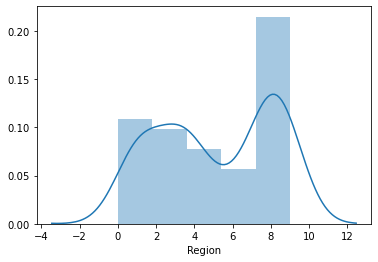

Happiness Rank
0.00041448599029589935


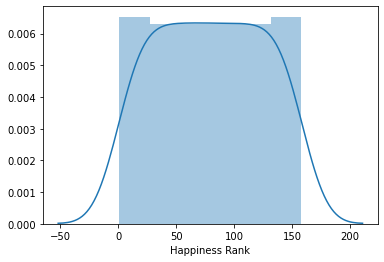

Happiness Score
0.0968384478392508


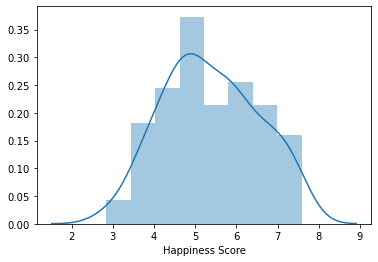

Standard Error
1.9645593962076815


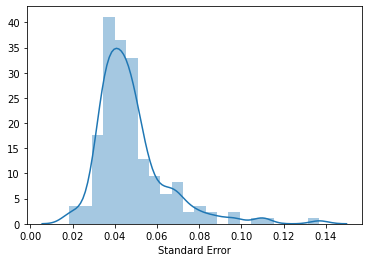

Economy (GDP per Capita)
-0.31455171687947087


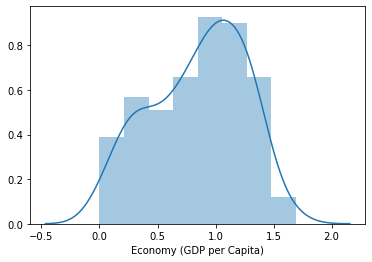

Family
-0.9973086936977792


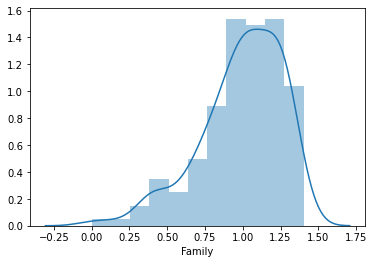

Health (Life Expectancy)
-0.69861459190758


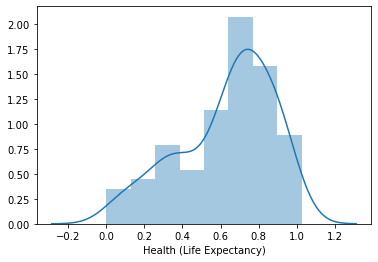

Freedom
-0.40952630345169977


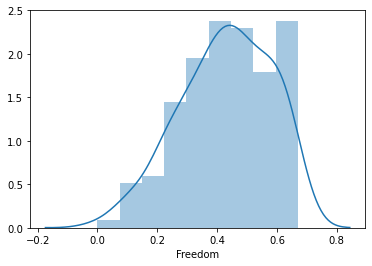

Trust (Government Corruption)
1.3722746285872591


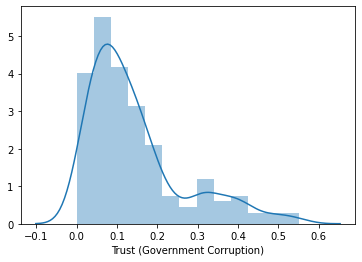

Generosity
0.9924230947758468


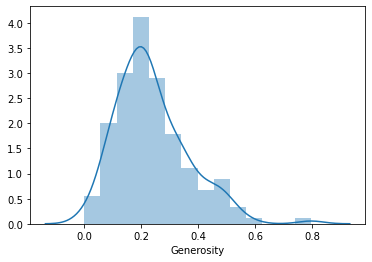

Dystopia Residual
-0.23663666076601247


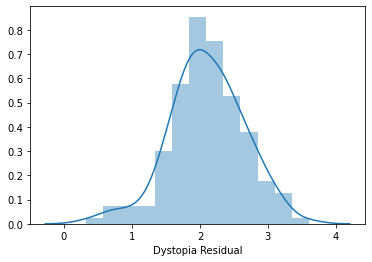

In [38]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    sns.distplot(df[col])
    plt.show()

In [8]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [9]:
df.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

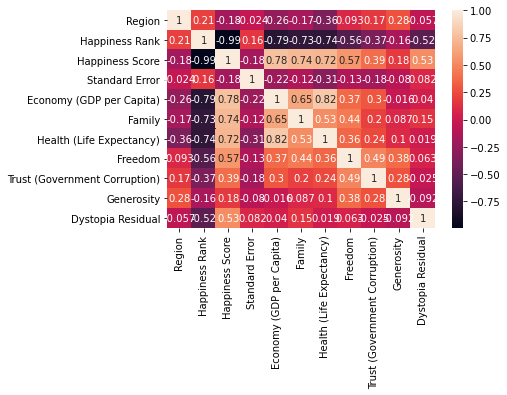

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.046643,0.846137,0.991046,0.630259,0.428615,0.128967,0.207967,2.098977
std,2.993321,45.754363,1.145010,0.016115,0.403121,0.272369,0.247078,0.150693,0.098993,0.098864,0.553550
min,0.000000,1.000000,2.839000,0.018311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.036590,0.545808,0.856823,0.439185,0.328330,0.059848,0.140242,1.759410
50%,4.500000,79.500000,5.232500,0.043002,0.910245,1.029510,0.696705,0.435515,0.101852,0.195674,2.095415
75%,8.000000,118.750000,6.243750,0.050978,1.158448,1.214405,0.811013,0.549092,0.165730,0.269936,2.462415
max,9.000000,158.000000,7.587000,0.128332,1.690420,1.402230,1.025250,0.669730,0.439486,0.585495,3.602140


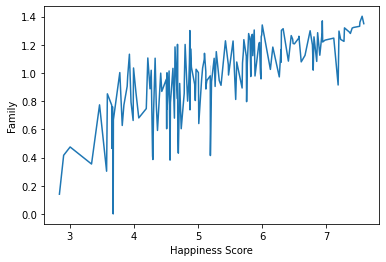

In [12]:
sns.lineplot(x='Happiness Score',y='Family',data=df)

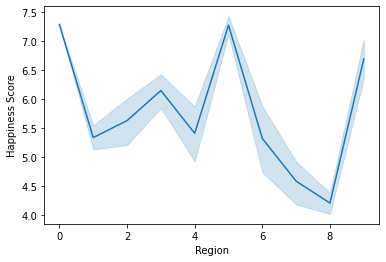

In [13]:
sns.lineplot(y='Happiness Score',x='Region',data=df)

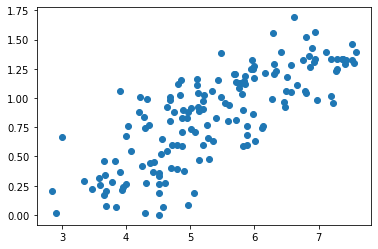

In [14]:
plt.scatter(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

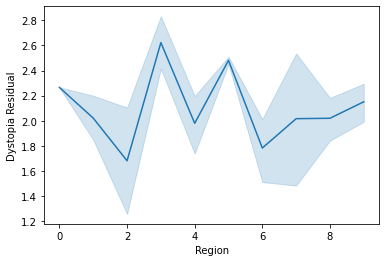

In [15]:
sns.lineplot(x='Region',y='Dystopia Residual',data=df)

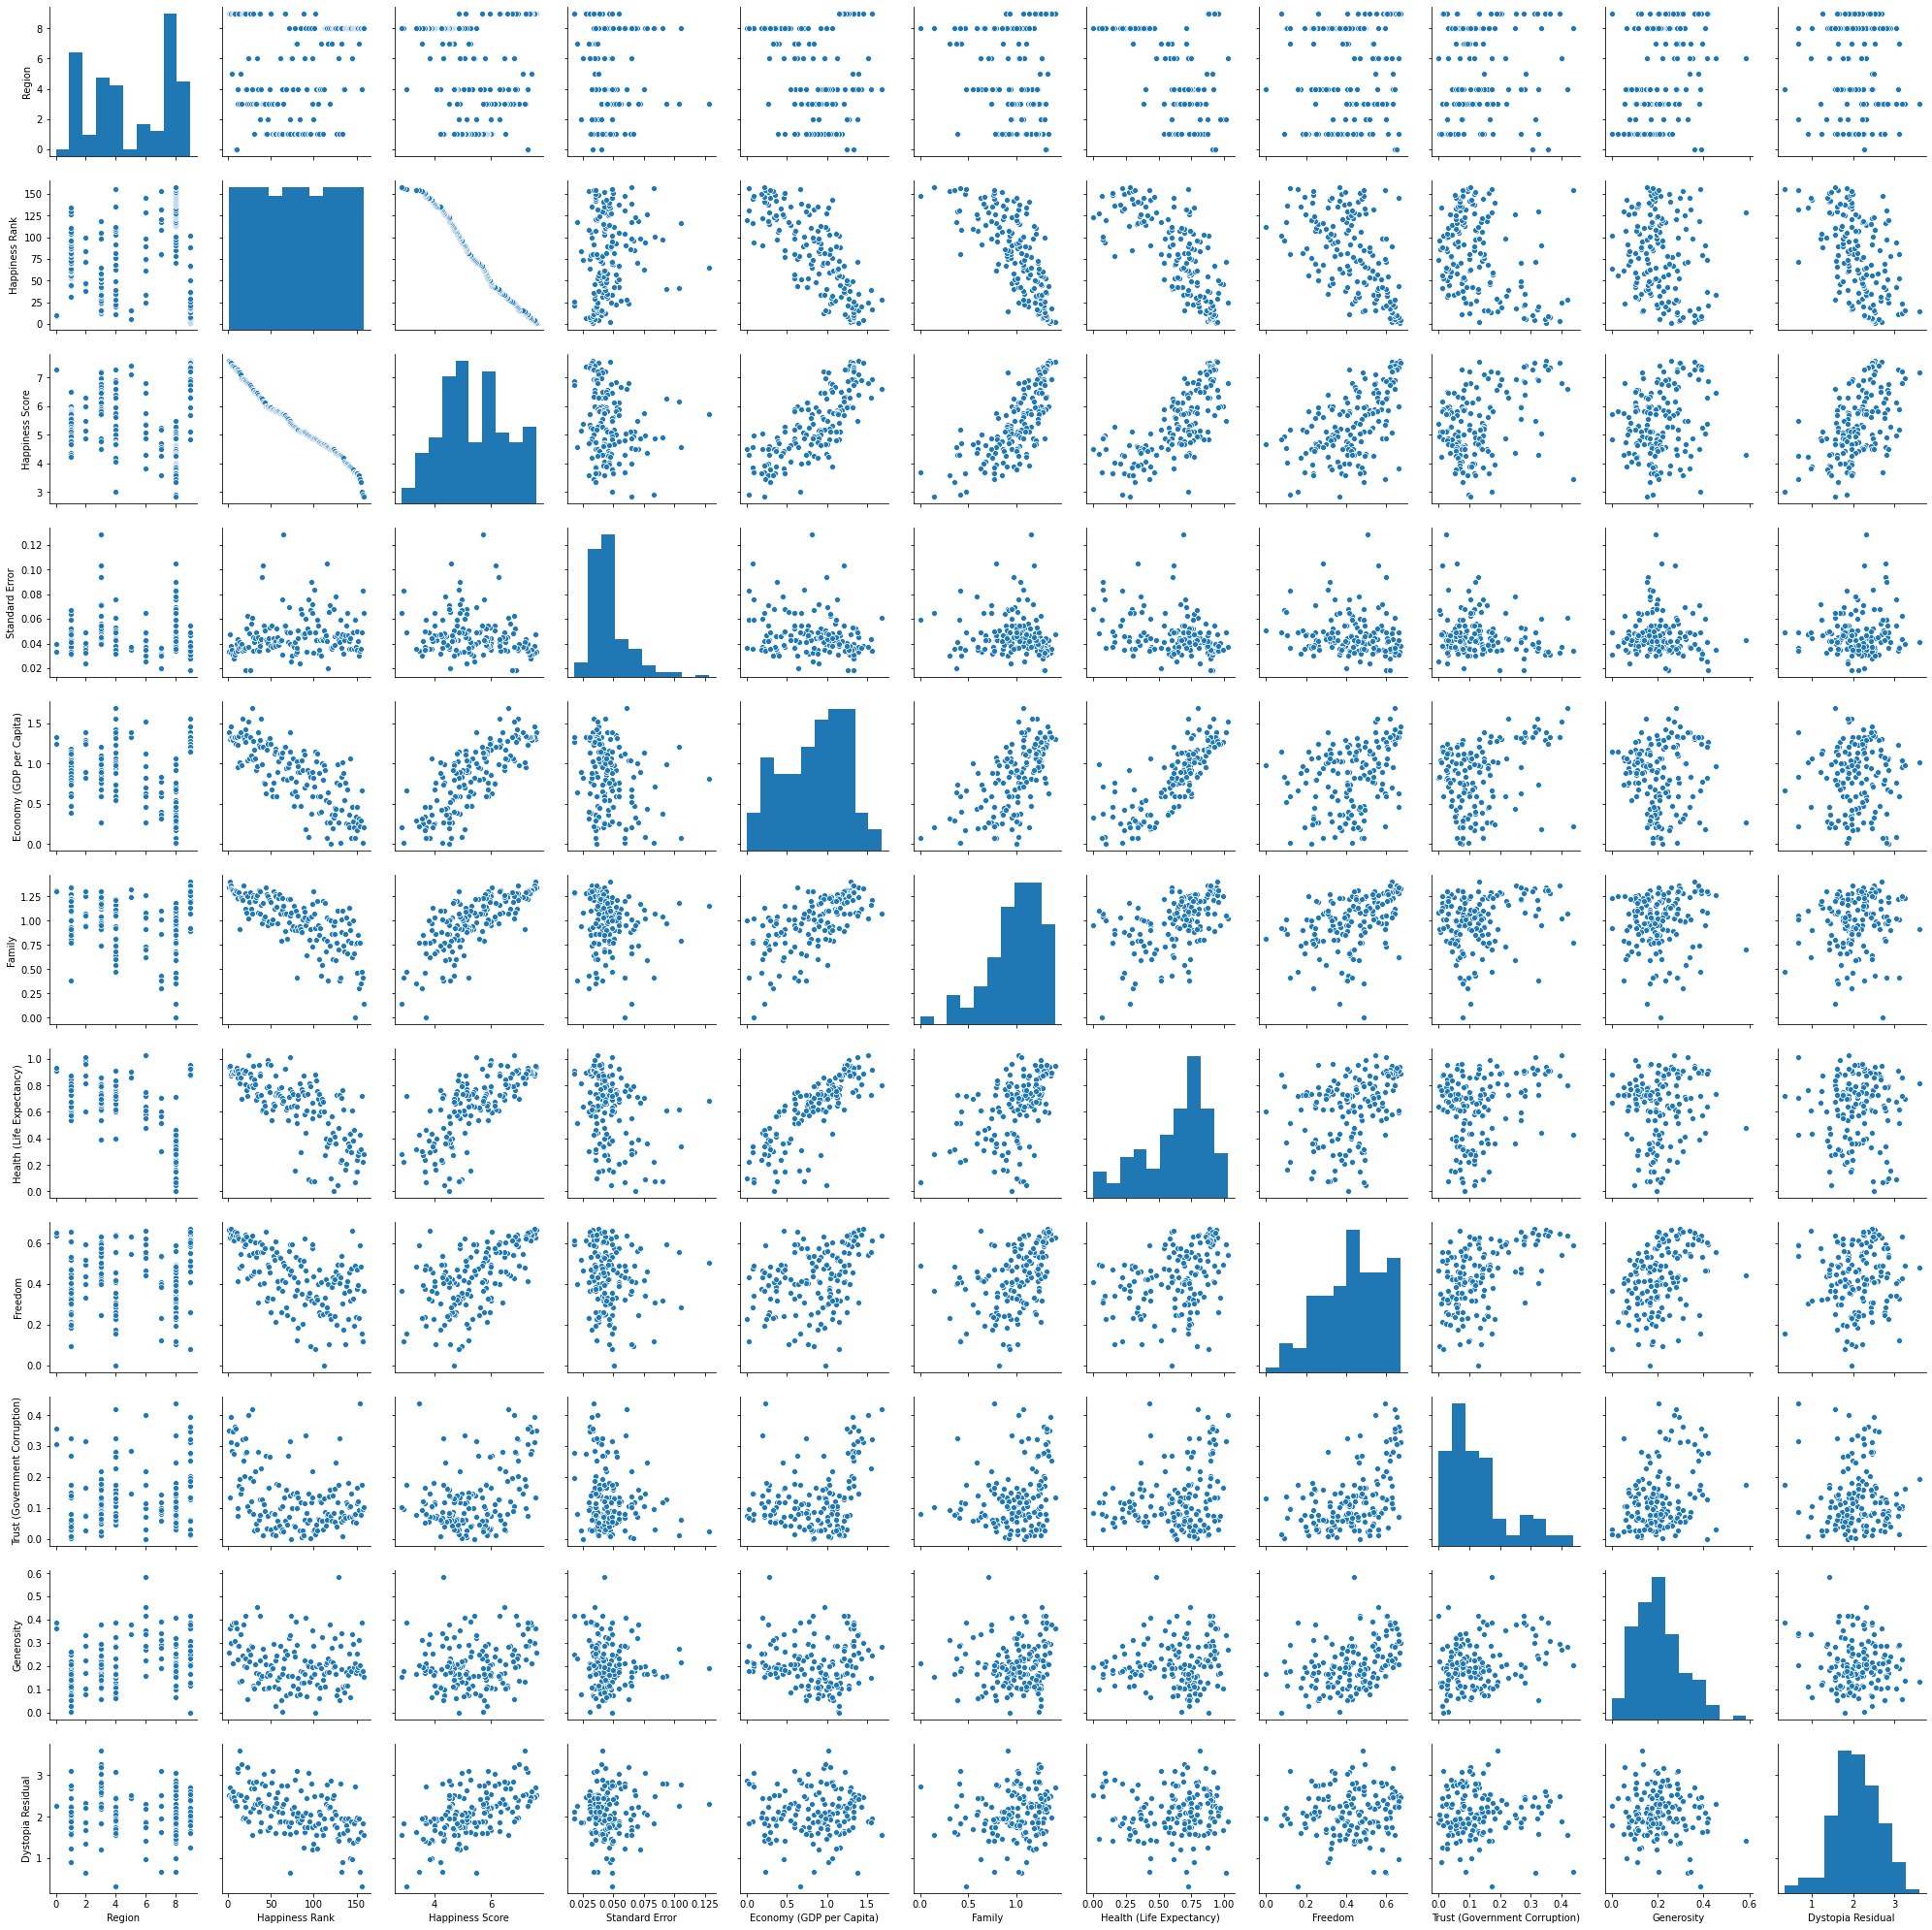

In [16]:
sns.pairplot(df)

Region                               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Happiness Rank                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Happiness Score                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Standard Error                    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Economy (GDP per Capita)            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Family                           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Health (Life Expectancy)         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Freedom                          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Trust (Government Corruption)       AxesSubplot(0.125,0.321957;0.168478x0.16413)
Generosity                       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Dystopia Residual                AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

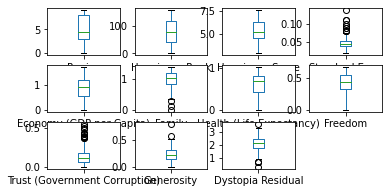

In [39]:
df.plot(kind='box',subplots=True,layout=(4,4))

# removing outliers

In [40]:
threshold=3
z=abs(zscore(df))
z

array([[1.30025593, 1.72099989, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.69907456, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.67714922, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 1.67742676, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 1.69935209, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 1.72127743, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [43]:
df=df_new

In [44]:
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [45]:
y=df.iloc[0:,-11]

In [46]:
x=df.iloc[0:,1:12]


In [47]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [48]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-1.713905,1.947945,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,-1.691535,1.924469,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-1.669166,1.893769,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-1.646796,1.889255,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-1.624427,1.803478,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,1.641542,-1.602327,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,1.663911,-1.663725,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,1.686281,-1.674560,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,1.731020,-1.886746,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


In [49]:
maxx_r_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,train_size=.80)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,predlg)
    if acc_scr>maxx_r_score:
        maxx_r_score=acc_scr
        final_r_state=r_state
        
        
print('the maximum accuracy score at',final_r_state,'is:',maxx_r_score)

the maximum accuracy score at 68 is: 0.8333333333333334


# cross validation:

In [50]:
cross_score=cross_val_score(lg,x,y,cv=5)
print(cross_score.mean())
print(cross_score.std())

0.5696551724137932
0.10173446275286048


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,train_size=.80)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)

In [52]:
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.5666666666666667
[[1 0 2 0 0 0 0 0]
 [2 0 0 0 0 0 0 0]
 [1 0 3 0 0 0 0 0]
 [2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 9 0]
 [2 0 0 1 0 0 0 3]]
              precision    recall  f1-score   support

           1       0.12      0.33      0.18         3
           2       0.00      0.00      0.00         2
           3       0.60      0.75      0.67         4
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.33      0.50         3
           8       0.82      1.00      0.90         9
           9       1.00      0.50      0.67         6

    accuracy                           0.57        30
   macro avg       0.44      0.36      0.36        30
weighted avg       0.64      0.57      0.56        30



# best model in svc

In [53]:
parameters={'kernel':['rbf','linear','poly'],'C':[1,10,15]}
svc=SVC()
grid=GridSearchCV(svc,parameters)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'kernel': 'linear'}
0.5898850574712644


# cross validation

In [54]:
cross_score=cross_val_score(svc,x,y,cv=5)
print(cross_score.mean())
print(cross_score.std())

0.5689655172413793
0.12406766849360057


# best model in dtc

In [55]:
parameters={'criterion':['gini','entrophy']}
dtc=DecisionTreeClassifier()
grid=GridSearchCV(dtc,parameters)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini'}
0.5222988505747127


# cross validation

In [56]:
cross_score=cross_val_score(dtc,x,y,cv=5)
print(cross_score.mean())
print(cross_score.std())

0.535632183908046
0.1281987985876143


# best model as per lasso

In [57]:
parameters={'alpha':[.0001,.001,.01,.1,1,10]}
ls=Lasso('alpha')
grid=GridSearchCV(ls,parameters)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0001}
-0.21490076226141533


# best model as per ridge

In [58]:
parameters={'alpha':[.0001,.001,.01,.1,1,10]}
rd=Ridge('alpha')
grid=GridSearchCV(rd,parameters)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
-0.21406315325824524


# best model as per elasticnet

In [59]:
parameters={'alpha':[.0001,.001,.01,.1,1,10]}
enr=ElasticNet('alpha')
grid=GridSearchCV(enr,parameters)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0001}
-0.21450636385756644


observation:
    we are obtaining the max accuracy in Logistic model so the optimum model selection for the given dataset is Logistics Regression